# LAB 3 - REGRESION LOGISTICA


Universitarios:   

        Aly Delgado Danner Abel     CU: 35-5281

        Aramayo Valdez Joaquin      CU: 35-5344


Link del dataset: https://www.kaggle.com/datasets/nathanlauga/nba-games


Link del Git Hub: https://github.com/Joaco15045F/InteligenciaArtificial/tree/main/Laboratorios/Laboratorio3

In [94]:
#from google.colab import drive
#drive.mount('/content/drive')

Importamos las librerias necesarias

In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# 1. Preparamos los datos



Cargamos el dataset

In [3]:
# Cargar datos
file_path = 'games.csv'
# Cargar el archivo CSV usando pandas
data = pd.read_csv(file_path)
data

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


Preparamos el DATASET       

In [4]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away

Descartaremos columnas que no son necesarias para el analisis o que tienen muchos datos perdidos

In [5]:
data.drop(['GAME_DATE_EST'], axis=1, inplace=True)
data.drop(['GAME_ID'], axis=1, inplace=True)
data.drop(['GAME_STATUS_TEXT'], axis=1, inplace=True)
data.drop(['HOME_TEAM_ID'], axis=1, inplace=True)
data.drop(['VISITOR_TEAM_ID'], axis=1, inplace=True)
data.drop(['TEAM_ID_home'], axis=1, inplace=True)
data.drop(['TEAM_ID_away'], axis=1, inplace=True)
data.drop(['SEASON'], axis=1, inplace=True)


In [6]:
#Imprimimos los datos para ver que se hayan eliminado las columnas
data

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,93.0,0.419,0.821,0.421,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,81.0,0.338,0.719,0.381,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,98.0,0.448,0.682,0.500,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,99.0,0.440,0.771,0.333,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1


In [7]:
#Mostramos los datos ya listos para ser procesados
data

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,93.0,0.419,0.821,0.421,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,81.0,0.338,0.719,0.381,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,98.0,0.448,0.682,0.500,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,99.0,0.440,0.771,0.333,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1


Verificamos que no haya datos vacios

In [8]:
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())


DATOS VACIOS
PTS_home          99
FG_PCT_home       99
FT_PCT_home       99
FG3_PCT_home      99
AST_home          99
REB_home          99
PTS_away          99
FG_PCT_away       99
FT_PCT_away       99
FG3_PCT_away      99
AST_away          99
REB_away          99
HOME_TEAM_WINS     0
dtype: int64


In [9]:
# Eliminar filas con valores NaN
data = data.dropna()

Verificamos nuevamente que no haya datos NaN

In [10]:
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())


DATOS VACIOS
PTS_home          0
FG_PCT_home       0
FT_PCT_home       0
FG3_PCT_home      0
AST_home          0
REB_home          0
PTS_away          0
FG_PCT_away       0
FT_PCT_away       0
FG3_PCT_away      0
AST_away          0
REB_away          0
HOME_TEAM_WINS    0
dtype: int64


Dividimos el data set: **20 %** para pruebas y **80 %** para entrenamiento

In [11]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.iloc[:, :12]  # Selecciona las columnas de la 0 a la 13 (14 columnas en total)
y_test = test_data.iloc[:, 12]   # Selecciona la columna 14 (la 15ª columna)

# Dividimos los datos para X_train y y_train para el entremamiento
X_train = train_data.iloc[:, :12]
y_train = train_data.iloc[:, 12]

m = y_train.size


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el test son: {:.0f}".format(len(test_data)))
     

Datos de X_train:
       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
17102      83.0        0.400        0.778         0.400      21.0      46.0   
18762     102.0        0.419        0.821         0.333      18.0      42.0   
3884      107.0        0.368        0.926         0.300      22.0      46.0   
18338     106.0        0.452        0.758         0.455      27.0      32.0   
17775     108.0        0.586        0.786         0.444      29.0      35.0   
...         ...          ...          ...           ...       ...       ...   
21674     115.0        0.462        0.667         0.355      19.0      52.0   
5390      101.0        0.453        0.757         0.227      20.0      44.0   
860       134.0        0.558        0.710         0.390      21.0      44.0   
15795     112.0        0.535        0.875         0.429      31.0      44.0   
23753     107.0        0.457        0.706         0.407      26.0      47.0   

       PTS_away  FG_PCT_away  FT_

# 2. Implementacion de la regresión logística

Se llama a la función implementada para mostrar los datos cargados:

Conjunto de datos con todos los partidos de la NBA desde la temporada 2004 hasta diciembre 2020 En esta parte del ejercicio, creará un modelo de regresión logística para predecir los partidos del Equipo de NBA si todos sus partidos de local fueron ganadas(Si) o fue derrotas(No).

Para los partidos jugados de local se necesita registros que seran evaluados en el transcurso del proceso.

Los datos que se conocen son: FG_PCT_home, FT_PCT_home, FG3_PCT_home, AST_home, REB_home, TEAM_ID_away, PTS_away, FG_PCT_away, FT_PCT_away, FG3_PCT_away, AST_away, REB_away, HOME_TEAM_WINS.

El modelo que debemos aplicar es Regresión logistica donde calcularemos la probabilidad si el equipo del BNA ganó partidos de local (Si/No).

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [12]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar
    
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalizamos los Datos

In [13]:
X_norm, mu, sigma = featureNormalize(X_train)

Mostramos los datos normalizados

In [14]:
X_norm

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
17102,-1.545981,-1.074426,0.176025,0.390888,-0.356545,0.395072,-1.018514,-0.860888,0.881244,-0.577762,-0.296180,0.745694
18762,-0.114204,-0.739411,0.602962,-0.212366,-0.935077,-0.209835,0.246861,1.175109,0.400748,1.371494,0.091278,-1.395390
3884,0.262579,-1.638660,1.645483,-0.509491,-0.163701,0.395072,1.437802,1.319251,0.064401,1.243972,0.672466,0.745694
18338,0.187223,-0.157545,-0.022550,0.886096,0.800519,-1.722101,0.246861,1.463392,1.044613,-0.331828,-0.683639,-0.171914
17775,0.337936,2.205187,0.255455,0.787055,1.186207,-1.268421,-0.571911,0.904844,1.813407,-0.450241,0.091278,-1.701259
...,...,...,...,...,...,...,...,...,...,...,...,...
21674,0.865433,0.018779,-0.926069,-0.014283,-0.742233,1.302432,1.214500,0.796738,0.237379,1.826927,0.285008,-0.936586
5390,-0.189561,-0.139912,-0.032479,-1.166768,-0.549389,0.092618,-0.274176,-0.608640,0.343089,-0.805479,-1.458556,-1.242456
860,2.297210,1.711482,-0.499132,0.300850,-0.356545,0.092618,1.809971,0.904844,0.948514,0.405974,1.059924,-1.395390
15795,0.639363,1.305938,1.139116,0.651998,1.571895,0.092618,-1.613985,-0.987012,-0.877372,-0.504893,-0.296180,-1.701259


In [15]:
# Obtener las dimensiones del array
m, n = X_train.shape

print(f"m (número de filas): {m}")
print(f"n (número de columnas): {n}")

m (número de filas): 21241
n (número de columnas): 12


Agregamos una columna de unos

In [16]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [17]:
X_ready

array([[ 1.        , -1.54598096, -1.0744255 , ..., -0.57776239,
        -0.29618017,  0.74569363],
       [ 1.        , -0.11420399, -0.73941131, ...,  1.3714935 ,
         0.09127829, -1.39539006],
       [ 1.        ,  0.26257942, -1.63865993, ...,  1.24397209,
         0.67246598,  0.74569363],
       ...,
       [ 1.        ,  2.29720985,  1.711482  , ...,  0.40597423,
         1.05992444, -1.39539006],
       [ 1.        ,  0.63936283,  1.3059385 , ..., -0.50489301,
        -0.29618017, -1.70125916],
       [ 1.        ,  0.26257942, -0.06938292, ...,  1.3714935 ,
         0.67246598, -2.00712826]])

    Definimos la función Sigmoidea

La función sigmoidea o tambien llamada función de logistica, nos permite calcaluar o predecir una probabilidad de un hecho que de 0 a 1. Donde z es la transpues de theta por X, que es nuestra hipótesis.

In [18]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. Se recomienda experimentar con otros valores de `z`.

In [19]:
# Prueba la implementacion de la funcion sigmoid
print(sigmoid(0))

0.5


In [20]:
# Prueba la implementación de la funcion sigmoidea
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


    Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [21]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [22]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [23]:
from matplotlib import pyplot

theta calculado por el descenso por el gradiente: [ 0.92387519  2.35471693  0.82136034  0.25640665  0.3020415   0.20277659
  0.32182931 -2.38544782 -0.84231072 -0.24575103 -0.28670696 -0.21966176
 -0.35193052]


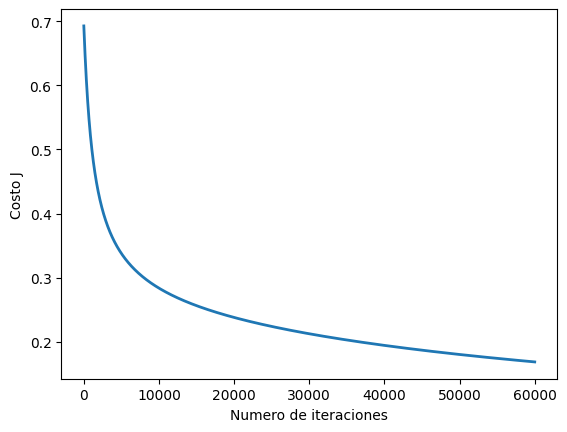

In [24]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 60000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(13)
theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [25]:
print(f"Con un costo de: { J_history[-1]} ")

Con un costo de: 0.1682928943584011 


Ahora realizamos unas pruebas para ver si el equipo gana o no el partido

# 3. TEST de validación

Haremos las pruebas del rendimiento del modelo con el 20% de los datos 

In [26]:
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

X_test_norm

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
3578,1.242216,0.988557,-1.075000,0.444911,1.571895,-1.570875,1.809971,1.337268,-0.223897,1.216646,1.447383,0.745694
9770,1.392930,2.169922,0.672464,1.291267,0.993363,-1.419648,0.172427,0.652597,-0.589074,0.861408,0.866195,-1.089521
9003,-0.415631,0.812233,0.176025,-2.571360,-0.549389,-2.327008,0.767897,1.139074,0.400748,0.916060,0.091278,-0.018979
26587,-1.319911,-1.074426,0.781680,-0.212366,-0.356545,-0.965968,-0.348610,-0.194234,2.322734,1.134668,0.672466,-0.171914
18869,-2.751688,-1.074426,0.722107,0.390888,-1.513608,-0.209835,-2.209456,-2.320319,-2.251592,-0.577762,-0.877368,0.592759
...,...,...,...,...,...,...,...,...,...,...,...,...
24750,-1.244554,-0.563088,-2.028162,-1.337840,-0.163701,0.395072,0.470162,-1.149171,-1.108010,0.342214,0.091278,1.816235
23140,1.016146,0.794601,0.176025,0.525945,-0.549389,0.243845,0.544596,-0.374411,-0.877372,0.323996,1.253654,0.286890
22205,-0.038847,0.688807,0.255455,-0.059302,-0.549389,0.092618,-0.125309,-0.014057,-2.165102,-0.149655,-0.877368,-1.548325
4031,0.639363,0.477219,-0.101981,0.003725,0.993363,0.999978,0.172427,-0.374411,1.640429,-0.377372,1.447383,-0.477783


Concatenamos con una columna de unos a la izquierda

In [27]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print(X_test_ready)

[[ 1.          1.2422163   0.98855663 ...  1.21664607  1.4473829
   0.74569363]
 [ 1.          1.39292966  2.16992247 ...  0.86140785  0.86619521
  -1.08952096]
 [ 1.         -0.41563072  0.81223337 ...  0.91605988  0.09127829
  -0.01897912]
 ...
 [ 1.         -0.03884731  0.68880709 ... -0.14965479 -0.87736786
  -1.54832461]
 [ 1.          0.63936283  0.47721918 ... -0.3773716   1.4473829
  -0.47778277]
 [ 1.          1.39292966  0.79460105 ... -0.14965479 -0.87736786
  -0.93658642]]


In [28]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta)))


y_predicha = np.array(y_predicha)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

In [29]:
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha*100, columns = ['Probabilidad de victoria %'])
df_pred['Probabilidad de victoria %'] = df_pred['Probabilidad de victoria %'].abs()

In [126]:
pd.set_option('display.max_columns', None)

In [34]:
X_columans = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away']
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['Valores del Y Reales'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([ y_test, df_pred, X_test], axis = 1)
df_resultado.head(200)

,Valores del Y Reales,Probabilidad de victoria %,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,0,12.075361,120.0,0.517,0.652,0.406,31.0,33.0,125.0,0.524,0.735,0.483,29.0,47.0
1,1,99.560578,122.0,0.584,0.828,0.500,28.0,34.0,103.0,0.486,0.697,0.444,26.0,35.0
2,0,1.559271,98.0,0.507,0.778,0.071,20.0,28.0,111.0,0.513,0.800,0.450,22.0,42.0
3,0,3.551389,86.0,0.400,0.839,0.333,21.0,37.0,96.0,0.439,1.000,0.474,25.0,41.0
4,0,80.514476,67.0,0.400,0.833,0.400,15.0,42.0,71.0,0.321,0.524,0.286,17.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,12.549121,105.0,0.424,0.864,0.296,21.0,39.0,106.0,0.469,1.000,0.444,30.0,42.0
196,1,99.988734,124.0,0.549,0.885,0.500,34.0,49.0,95.0,0.414,0.857,0.313,18.0,37.0
197,1,99.859607,135.0,0.549,0.811,0.455,29.0,50.0,111.0,0.506,0.824,0.375,21.0,29.0
198,0,40.593366,110.0,0.474,0.733,0.389,21.0,43.0,112.0,0.435,0.786,0.485,24.0,47.0


## Presición de nuestro modelo de regresion logaritmica

Usamos el metodo np.mean, la media (promedio) de los valores booleanos. Donde True se considera como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de los elementos iguales en y_predicha e y_test.

In [35]:
y_umbral = (y_predicha >= 0.5).astype(int)

In [36]:

# Mostramos la precisión de entrenamiento
print("Precisión de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test.values.ravel()) * 100))

Precisión de entrenamiento: 95.24 % 


En conclusión, la precisión de entrenamiento de nuestro modelo es del 95.24 % lo que demuestra que es muy preciso al momento de predecir si el equipo ganará o no el partido de la NBA